In [2]:
import pandas as pd
import matplotlib.pyplot as plt

This data has 5 sentiment labels:

0 - negative 1 - somewhat negative 2 - neutral 3 - somewhat positive 4 - positive

In [3]:
data = pd.read_csv('train.tsv', sep='\t')

In [5]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [7]:
data.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

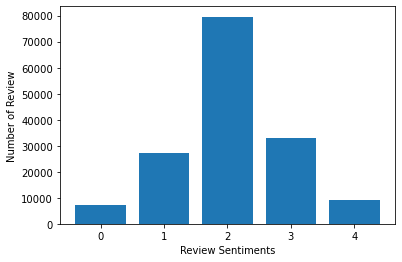

In [6]:
Sentiment_count = data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

### Bag of Words

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-z0-9]+')
cv = CountVectorizer(lowercase = True, stop_words = 'english', ngram_range = (1,1), tokenizer = token.tokenize)
text_counts = cv.fit_transform(data['Phrase'])

### Train test split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_counts, data['Sentiment'], test_size = 0.3, random_state = 42)

### Model Building and Evaluation

In [18]:
# menggunakan model Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
print('Multinomial Naive Bayes Accuracy : ' + str(metrics.accuracy_score(y_test, predicted)))

Multinomial Naive Bayes Accuracy : 0.6068819684736639


Akurasinya belum bagus. Kita harus improve model kita. Maka kita coba gunakan TF-IDF untuk feature extraction.

### TF-IDF

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
text_tf = tfidf.fit_transform(data['Phrase'])

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_tf, data['Sentiment'], test_size = 0.3, random_state = 42)

### Model Building and Evaluation (TF-IDF)

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
print('Multinomial Naive Bayes Accuracy : ' + str(metrics.accuracy_score(y_test, predicted)))

Multinomial Naive Bayes Accuracy : 0.5815284719552309


Ternyata menggunakan TF-IDF, akurasi model yang dihasilkan lebih kecil dibanding menggunakan Bag of Words. Maka harus dilakukan beberapa improvement menggunakan feature extraction yang lain.